In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Get the data from the link below

https://www.kaggle.com/hugomathien/soccer

## Get the data from sqlite 3

In [4]:
# Substitute Path where you store the data
path='database.sqlite'
cnx=sqlite3.connect(path)
players=pd.read_sql_query("SELECT * from Player_Attributes",cnx)

In [5]:
players.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


* Lets try to predict the *Overall_rating* of aplayer given player attributes
* There are 42 attributes (some like player id and the id are not useful for prediction

In [6]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [12]:
features=['potential','crossing','finishing','heading_accuracy','short_passing','volleys','dribbling']

Text(0, 0.5, 'Player Rating')

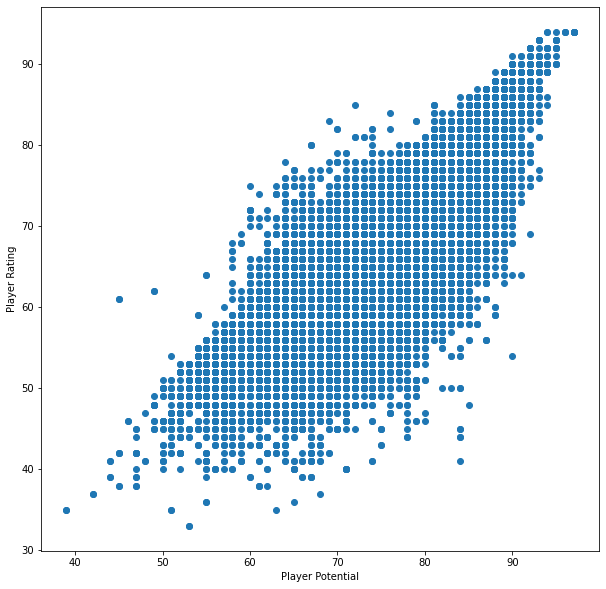

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(players.potential,players.overall_rating)
plt.xlabel('Player Potential')
plt.ylabel('Player Rating')

In [14]:
players.dropna(inplace=True)

In [15]:
features=players.loc[:,features].copy()

In [16]:
target=players.overall_rating

## Building the model

In [35]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.33,random_state=324)

In [36]:
X_train

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling
153356,83.0,25.0,25.0,25.0,27.0,25.0,25.0
159040,77.0,16.0,10.0,73.0,41.0,59.0,41.0
122440,69.0,13.0,12.0,12.0,26.0,16.0,19.0
164582,78.0,68.0,57.0,67.0,77.0,44.0,77.0
112833,77.0,31.0,65.0,51.0,51.0,44.0,54.0
...,...,...,...,...,...,...,...
90151,77.0,77.0,56.0,57.0,74.0,66.0,81.0
67558,65.0,57.0,64.0,58.0,57.0,67.0,62.0
93509,85.0,78.0,75.0,48.0,80.0,72.0,87.0
17597,74.0,69.0,40.0,41.0,77.0,37.0,48.0


In [37]:
linmod=LinearRegression()

In [38]:
linmod.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred=linmod.predict(X_test)

In [40]:
y_test.describe()

count    59517.000000
mean        68.635818
std          7.041297
min         33.000000
25%         64.000000
50%         69.000000
75%         73.000000
max         94.000000
Name: overall_rating, dtype: float64

In [41]:
predictions=pd.Series(y_pred,index=y_test.index)

In [42]:
predictions.describe()

count    59517.000000
mean        68.659042
std          5.581992
min         40.894587
25%         64.825822
50%         68.717497
75%         72.455854
max         88.722582
dtype: float64

In [43]:
dataset=X_test.copy()

In [44]:
dataset['actuals']=y_test

In [45]:
dataset['predictions']=predictions

In [49]:
dataset['percentage_diff']=((dataset.predictions-dataset.actuals)/dataset.actuals)*100

In [50]:
dataset.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,actuals,predictions,percentage_diff
35543,74.0,20.0,20.0,20.0,22.0,7.0,20.0,66.0,64.661851,-2.027499
28735,85.0,52.0,23.0,85.0,71.0,54.0,64.0,83.0,77.681055,-6.408368
168029,75.0,64.0,49.0,53.0,66.0,37.0,67.0,65.0,69.087125,6.287885
138117,86.0,67.0,71.0,76.0,72.0,68.0,84.0,74.0,78.487236,6.063833
123316,76.0,31.0,23.0,71.0,61.0,29.0,44.0,65.0,69.882612,7.511710


In [52]:
dataset.percentage_diff.describe()

count    59517.000000
mean         0.459230
std          6.786025
min        -21.294900
25%         -4.015345
50%         -1.001422
75%          3.495999
max         69.335562
Name: percentage_diff, dtype: float64

* Looking at the predictions versus actual and creating the datset
* The mean difference looks to be 0.4%, the median differnec being -1%
* There are some outliers where the model has made wrong predictions

In [57]:
RMSE_linreg=(mean_squared_error(y_true=y_test,y_pred=y_pred))**0.5

In [59]:
print(RMSE_linreg)

4.2428884302089465


## We can use a different Linear model to compare the RMSE (Decision Tree Regressor)

In [60]:
dt=DecisionTreeRegressor(max_depth=20)

In [61]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20)

In [62]:
y_pred=dt.predict(X_test)

In [63]:
predictions_dt=pd.Series(y_pred,index=y_test.index)

In [64]:
dt_dataset=X_test.copy()

In [65]:
dt_dataset['actuals']=y_test

In [66]:
dt_dataset['predictions']=predictions_dt

In [67]:
dt_dataset.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,actuals,predictions
35543,74.0,20.0,20.0,20.0,22.0,7.0,20.0,66.0,72.000000
28735,85.0,52.0,23.0,85.0,71.0,54.0,64.0,83.0,82.000000
168029,75.0,64.0,49.0,53.0,66.0,37.0,67.0,65.0,63.925926
138117,86.0,67.0,71.0,76.0,72.0,68.0,84.0,74.0,75.058824
123316,76.0,31.0,23.0,71.0,61.0,29.0,44.0,65.0,65.000000


In [68]:
dt_dataset['percentage_diff']=((dt_dataset.predictions-dt_dataset.actuals)/dt_dataset.actuals)*100

In [69]:
dt_dataset.percentage_diff.describe()

count    59517.000000
mean         0.044518
std          3.541117
min        -34.920635
25%         -0.714286
50%          0.000000
75%          0.555556
max         50.000000
Name: percentage_diff, dtype: float64

* On average this looks like a better fit with the average percent differnce b/w actuals and prediction being 0.04%
* The median difference is also smaller

In [70]:
RMSE_Decision_tree=(mean_squared_error(y_true=y_test,y_pred=y_pred))**0.5

In [72]:
print('RMSE Linear Regression is:',RMSE_linreg)
print('RMSE Decision_tree is:',RMSE_Decision_tree)

RMSE Linear Regression is: 4.2428884302089465
RMSE Decision_tree is: 2.275061276933452
